# Performance of LeNet-5

In [1]:

%matplotlib inline


import os
import matplotlib.pyplot as plt

from scripts.utils import ExpResults

In [16]:
plotproperties = {'font.size': 13,
                  'axes.titlesize': 'xx-large',
                  'axes.labelsize': 'xx-large',
                  'xtick.labelsize': 'xx-large',
                  'xtick.major.size': 7,
                  'xtick.minor.size': 5,
                  'ytick.labelsize': 'xx-large',
                  'ytick.major.size': 7,
                  'ytick.minor.size': 5,
                  'legend.fontsize': 'xx-large',
                  'figure.figsize': (8, 5),
                  'savefig.dpi': 300,
                  'savefig.format': 'jpg'}

import matplotlib as mpl
mpl.rcParams.update(plotproperties)

## Parameters and definitions

In [17]:
log_dir = '/home/brueckau/Repositories/snntoolbox_experiments/cifar10/mobilenet/log'
runlabel_analog = '01'
path_analog = os.path.join(log_dir, 'gui', runlabel_analog)

In [37]:
exp_analog = ExpResults(path_analog, '', '.', color1='steelblue')
# Convert flops to MACs.
exp_analog.operations_ann /= 2
experiments = [exp_analog]

In [34]:
# import numpy as np
# avg_mops_per_timestep = np.mean(np.diff(exp_analog.mean_computations_t))

## Plot error vs operations

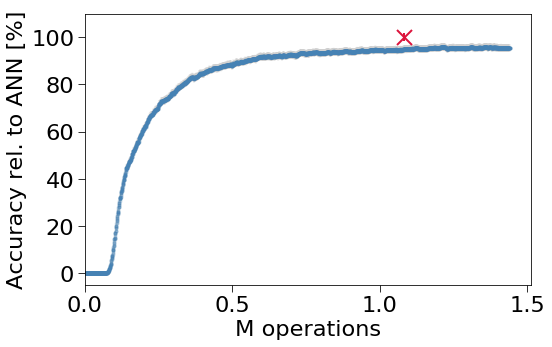

In [38]:
show_numbers = False

exp = experiments[0]

plt.errorbar(exp.mean_computations_t, 100 * (100 - exp.e1_mean) / (100 - exp.e1_ann), xerr=exp.std_computations_t,
             yerr=exp.e1_confidence95, fmt=exp.marker, label='SNN '+exp.label, 
             capsize=0, elinewidth=0.1, color=exp.color1, alpha=0.1)

plt.errorbar(exp.operations_ann, 100, marker='x', label='ANN '+exp.label, 
             color='crimson', markersize=15, yerr=exp.e1_confidence95_ann,
             elinewidth=2, capthick=2, markeredgewidth=2)
# plt.errorbar(exp.operations_ann, exp.e1_ann, marker='x', label='ANN '+exp.label, 
#              color=exp.color1, markersize=15, yerr=exp.e1_confidence95_ann,
#              elinewidth=2, capthick=2, markeredgewidth=2)

# plt.hlines(0, 0, 2)

if show_numbers:
    plt.annotate('SNN', xy=(0.2, 90), fontsize=16)
    plt.annotate('    ANN\n{:.2f}M macs'.format(exp.operations_ann), 
                 xy=(exp.operations_ann - 0.15, 75), fontsize=16, color='k')
    plt.annotate('{:.2f}M synops'.format(exp.op1_1), xy=(exp.op1_1, 90),
                 xytext=(exp.op1_1 - 0.155, 65), fontsize=16,
                 arrowprops=dict(color='k', shrink=0.05, width=5, headwidth=10), color='k')
    # plt.annotate('({:.2f}M ops, {:.2f}%)'.format(exp.operations_ann, exp.e1_ann), xy=(exp.operations_ann - 0.7, exp.e1_ann + 5), fontsize=16, color='k')
    # plt.annotate('({:.2f}M ops, {:.2f}%)'.format(exp.op1_1, exp.e1_1), xy=(exp.op1_1, exp.e1_1),
    #              xytext=(1.5 * exp.op1_1, exp.e1_1 + 15), fontsize=16,
    #              arrowprops=dict(color='k', shrink=0.05, width=5, headwidth=10), color='k')
plt.ylim(-5, 110)
plt.xlim(0, None)
plt.ylabel('Accuracy rel. to ANN [%]')
plt.xlabel('M operations')
# plt.legend(loc='upper right')
# plt.title('ANN vs SNN performance')
plt.savefig(os.path.join(log_dir, 'err_vs_ops'), bbox_inches='tight')

In [23]:
for exp in experiments:
    print(exp.label)
    print('ANN top-1:                         ({:.5f} MOps/frame, {:.2f} %)'.format(exp.operations_ann, exp.e1_ann))
    print('SNN top-1 best error:         ({:.5f} MOps/frame, {:.2f} %)'.format(exp.op1_0, exp.e1_0))
    print('SNN top-1 converged:        ({:.5f} MOps/frame, {:.2f} %)'.format(exp.op1_1, exp.e1_1))
    print('SNN top-1 jointly optimal:  ({:.5f} MOps/frame, {:.2f} %)'.format(exp.op1_optimal, exp.e1_optimal))
    print('SNN top-1 same op:           ({:.5f} MOps/frame, {:.2f} %)'.format(exp.op1_2, exp.e1_2))
    print('')


ANN top-1:                         (1.08198 MOps/frame, 29.37 %)
SNN top-1 best error:         (1.34221 MOps/frame, 27.78 %)
SNN top-1 converged:        (0.74306 MOps/frame, 28.57 %)
SNN top-1 jointly optimal:  (0.36598 MOps/frame, 38.89 %)
SNN top-1 same op:           (0.74306 MOps/frame, 28.57 %)



In [16]:
print(exp.mean_computations_t)
print(exp.e1_mean)

[  1.00000000e-10   1.54344000e-05   4.21775150e-03   2.25456448e-02
   5.03118092e-02   1.03228023e-01   1.73794919e-01   2.44925242e-01
   3.18305172e-01   3.92299020e-01   4.68242377e-01   5.43228506e-01
   6.18773413e-01   6.94115512e-01   7.69875428e-01   8.45312162e-01
   9.20609580e-01   9.96106067e-01   1.07141262e+00   1.14634348e+00
   1.22154180e+00   1.29651986e+00   1.37169354e+00   1.46937523e+00
   1.55182765e+00   1.62079528e+00   1.69063206e+00   1.76148664e+00
   1.83302229e+00   1.90560422e+00   1.97845582e+00   2.05151463e+00
   2.12496147e+00   2.19847171e+00   2.27222290e+00   2.34578550e+00
   2.41939989e+00   2.49320877e+00   2.56725043e+00   2.64088166e+00
   2.71492099e+00   2.78863473e+00   2.86252752e+00   2.93691898e+00
   3.03229950e+00   3.12892367e+00   3.20428837e+00   3.26976108e+00
   3.33665123e+00   3.40495621e+00]
[ 93.62  91.32  90.64  90.49  90.8   90.64  90.79  88.82  82.24  67.65
  47.74  30.67  18.49  11.34   7.21   4.81   3.38   2.55   2.07  